<font size = 4>**Code Instruction**

This notebook present my answer for Q1 - Q3. Run the following cells and you will get the results.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import sklearn
import urllib
import os

In [4]:
url = 'https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv'
file_name = 'green_tripdata_2015-09.csv'

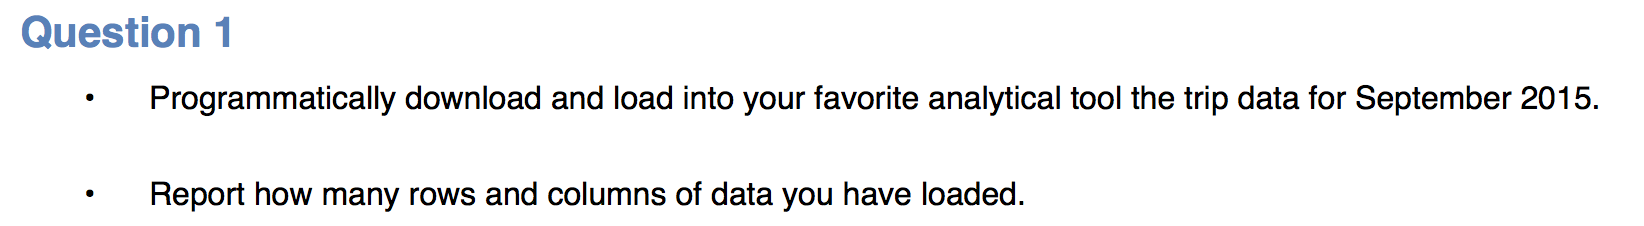

# 1.1 Download and read data from url

In [5]:
# Download the September 2015 dataset
if os.path.exists(file_name): # Check whether we already get the data
    data = pd.read_csv(file_name)
else: # If not, download and save
    data = pd.read_csv(url)
    data.to_csv(url.split('/')[-1])

# 1.2 Report how many rows and columns
 
 <font size = 3.5>Look at the dataframe shape, so that we can know the rows and columns number

In [6]:
print('Rows number: {row}\nColumns number: {column}'.format(row = data.shape[0], column = data.shape[1]))

Rows number: 1494926
Columns number: 21


 Look at data summary, no valid values in Ehial_fee, and 4 tirps have no Trip type, in a word data is pretty clean. Good! 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

In [8]:
data.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


 Look at some sample rows

In [9]:
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


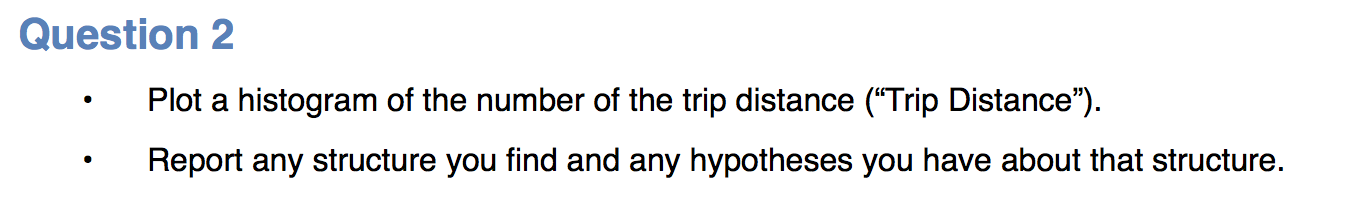

# 2.1 Plot histogram of the number of trip distance

look at trip distance description. 

In [10]:
print(data.Trip_distance.describe().iloc[1:])

# We want to check 95% data's value upper bound
print('95% of data would be smaller than {}'.format(sorted(data.Trip_distance)[int(0.95*data.shape[0])]))

mean      2.968141
std       3.076621
min       0.000000
25%       1.100000
50%       1.980000
75%       3.740000
max     603.100000
Name: Trip_distance, dtype: float64
95% of data would be smaller than 8.8


<font size = 3.5>Trip distance range is 0-603 miles. As we learn from the hist, the range is too large. However, the majority data would smaller than 1.98+(3.74-1.10)=4.62. Besides, after we sort the distance, we find 95% data would be smaller than 8.8. So for histgram, we set range 0-10 would be fine.

Text(0.5,1,'Histogram of Trip Distance (without outliers)')

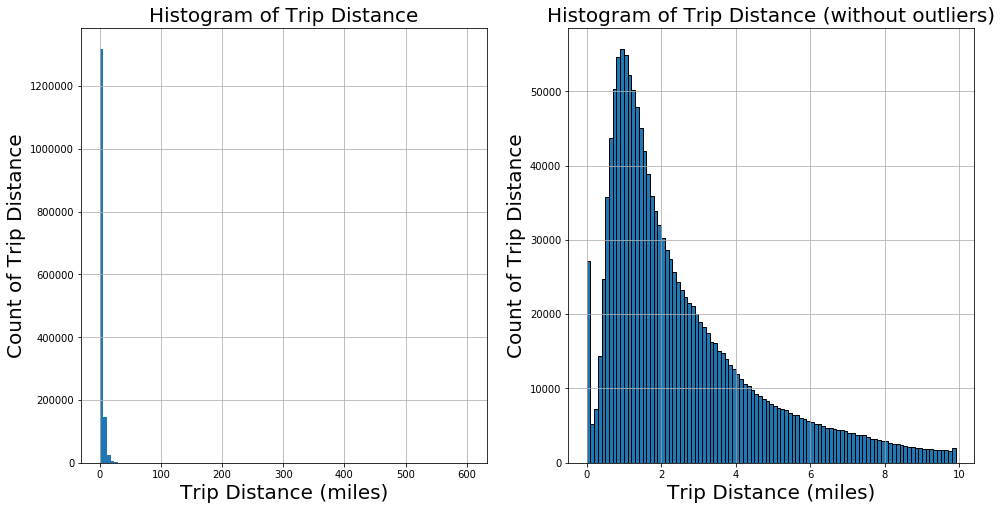

In [11]:
fig,ax = plt.subplots(1,2,figsize = (16,8)) 
break_points = [i/10 for i in range(0,100)]
# Plot whole histgram
data.Trip_distance.hist(ax = ax[0], bins = 100)
ax[0].set_xlabel('Trip Distance (miles)', size = 20)
ax[0].set_ylabel('Count of Trip Distance', size = 20)
ax[0].set_title('Histogram of Trip Distance', size = 20)
# Plot histgram with range 0-10
data.Trip_distance.hist(ax = ax[1],bins = break_points, edgecolor='black')
ax[1].set_xlabel('Trip Distance (miles)', size = 20)
ax[1].set_ylabel('Count of Trip Distance', size = 20)
ax[1].set_title('Histogram of Trip Distance (without outliers)', size = 20)

<font size = 4>From the histgram, we notice that:
1. It's right-skewed data. The data's median is smaller than the mean. 
- It's long tail distribution.
- Majority trip distance is between 1-3 miles. So we assume that there would be larger amount of needs in short distance trips due to some specific purposes, like rush hour ride, for work or for study.
- It looks like gamma distribution(we will explore later).
- There is a peak around 0. It might because some rounding issue or take the missing data to 0.

# 2.2 Report Structure and Hypothesis
### Hypothesis 1: Gamma Distribution
<font size = 3.5>The distribution is not normal distribution. The distribution seems like Gamma Distribution. So we want to see whether there is a overlap over gamma distribution. Two density curves are pretty similar.

/Users/youyang/virtualenvs/AML/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


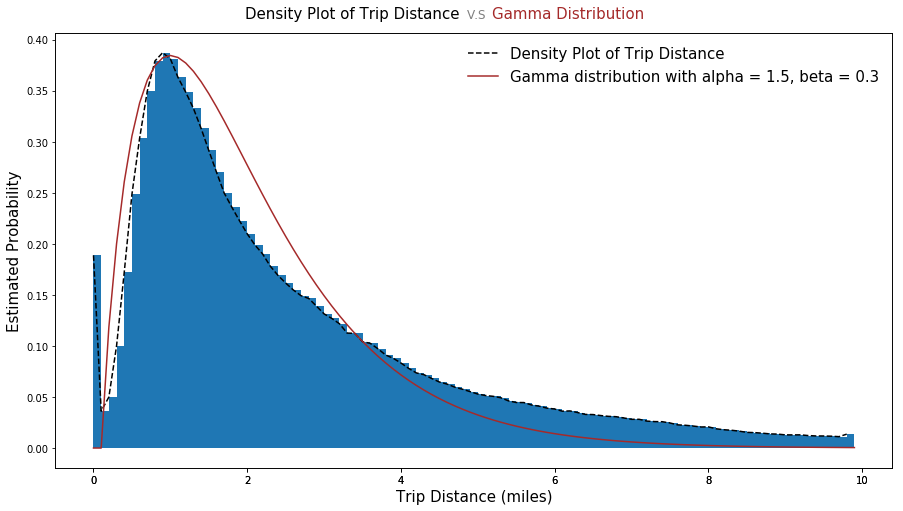

In [12]:
import scipy.stats as stats 
from scipy.stats import kde

break_points = [i/10 for i in range(0,100)]
# Set figure configuration
fig = plt.figure(figsize=(15, 8))
fig.text(0.6, 0.9, "Gamma Distribution",
         ha="center", va="bottom", fontsize=15, color="brown")
fig.text(0.515, 0.9, "V.S", ha="center", va="bottom", fontsize=12, color='grey')
fig.text(0.4, 0.9, "Density Plot of Trip Distance",
         ha="center", va="bottom", fontsize=15, color="black")
plt.xlabel('Trip Distance (miles)',size = 15)
plt.ylabel('Estimated Probability',size = 15)

# Plot Trip distance density histgram and density curve
ax1 = fig.add_subplot(111)
n, bins_limits, patches = ax1.hist(data.Trip_distance, normed=True, bins = break_points)
line1, = ax1.plot(bins_limits[:99],n,'--',color = 'black')
# Plot Gamma distribution
ax2 = ax1.twiny()
ax2.xaxis.tick_bottom()
y1 = stats.gamma.pdf(break_points, a=1.9, loc=0.1) #a is alpha, loc is beta???
line2, = ax2.plot(break_points, y1, color='brown')
# Add lengend
plt.legend((line1,line2,),  ('Density Plot of Trip Distance','Gamma distribution with alpha = 1.5, beta = 0.3',), loc=1,
           fontsize=15, ncol=1, frameon=False)

### Hypothesis 2: Missing data assigned to 0
<font size = 3.5>There is a peak around 0. The count of value 0 is much larger than nearby values. So we assume that there might be some missing values in trip distance and they were assigned to 0. We explore the data with trip distance = 0 to check their fare amount, pickup & dropoff time and location. 

And we find above 53% of them have more than 5 dollars fare amount. We assume these trip may have missing value in Trip_distance.

In [13]:
peak_0 = data[data.Trip_distance==0]
peak_0[peak_0.Fare_amount>=5].shape[0]/peak_0.shape[0]

0.5339937839937839

### Hypothesis 3: Rounding around 1 decimals
<font size = 3.5>As we look into data those are not outlier, we notice the number of trip distance at each 1 decimals would be relatively high, we think there might be rounding around each 1 decimals.
    
One of the possible reason might be different methods to record trip distance. So we look into store and forward trip feature. It turns out that store and forward trip record only record 1 decimals distance. It might because of some memory issue.

Text(0.5,1,'Histgram of Store and Forward Trip Distance (width = 0.01)')

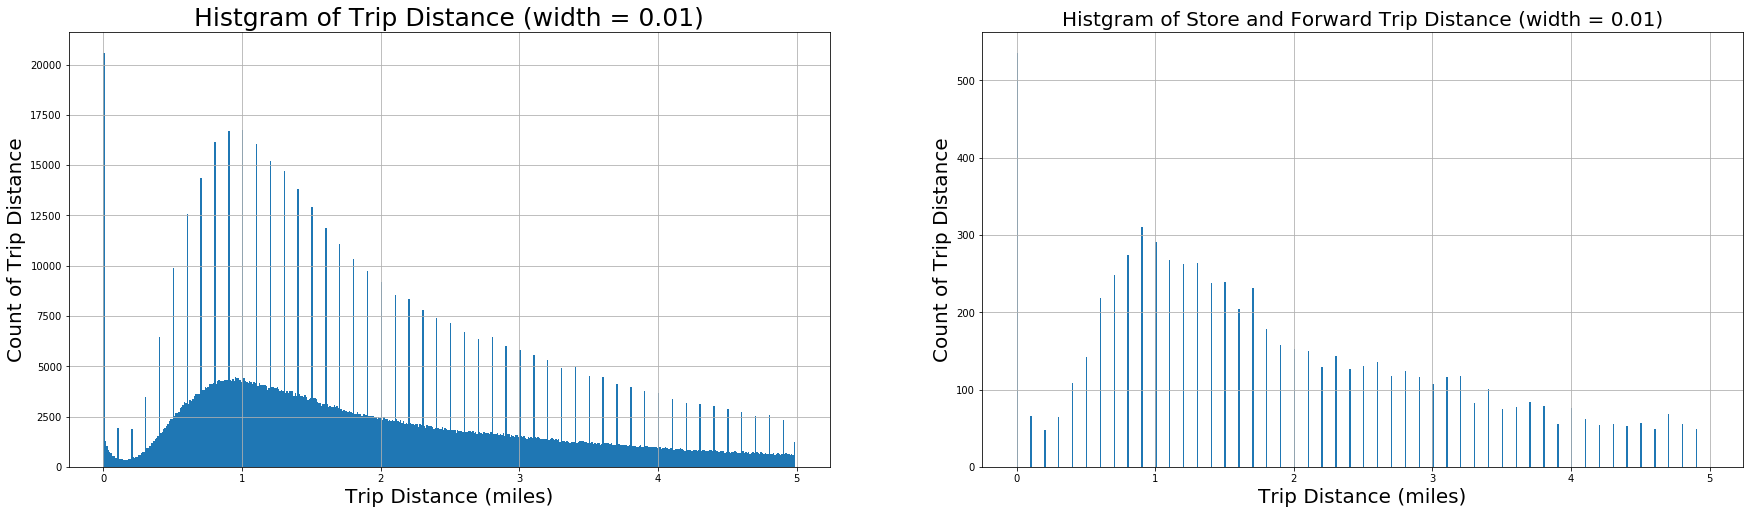

In [14]:
fig,ax = plt.subplots(1,2,figsize = (30,8)) 
break_points = [i/100 for i in range(0,500)]
# Plot whole histgram
data.Trip_distance.hist(ax = ax[0], bins = break_points)
ax[0].set_xlabel('Trip Distance (miles)',size = 20)
ax[0].set_ylabel('Count of Trip Distance',size = 20)
ax[0].set_title('Histgram of Trip Distance (width = 0.01)',size = 25)
# Plot histgram with range 0-10
data[data.Store_and_fwd_flag == 'Y'].Trip_distance.hist(ax = ax[1],bins = break_points)
ax[1].set_xlabel('Trip Distance (miles)',size = 20)
ax[1].set_ylabel('Count of Trip Distance',size = 20)
ax[1].set_title('Histgram of Store and Forward Trip Distance (width = 0.01)',size = 20)

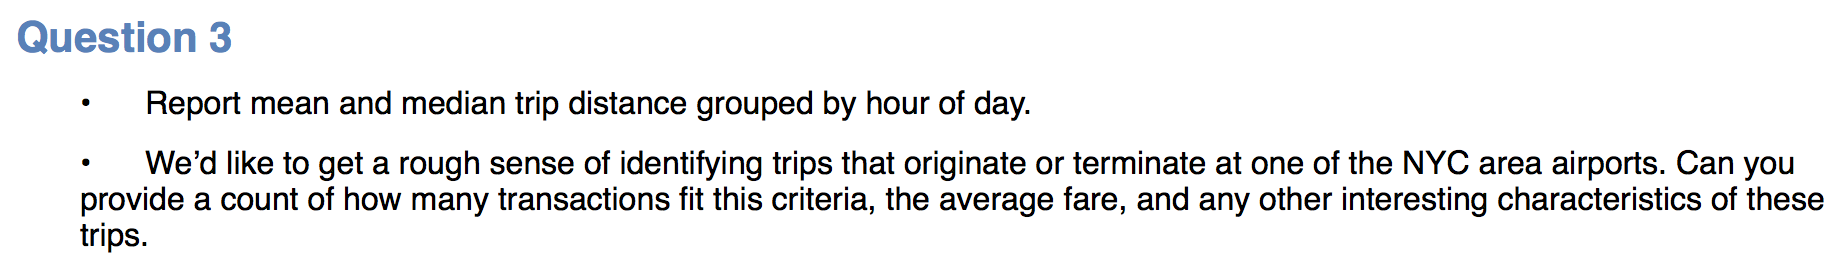

# 3.1 Report mean and median trip distance grouped by hour of day

Let's group trip distance by pick up time and calculate mean and median trip distance

In [15]:
# Get the pick up hour of a trip
data['Pickup_hour'] = pd.to_datetime(data.lpep_pickup_datetime).apply(lambda x: x.hour)
data['Dropoff_hour'] = pd.to_datetime(data.Lpep_dropoff_datetime).apply(lambda x: x.hour)
trip_mean = data.Trip_distance.mean()
trip_median = data.Trip_distance.median()
# Caculate the mean and median by hour
table = data.pivot_table(values = 'Trip_distance', index = 'Pickup_hour', 
                         aggfunc = [np.mean, np.median])
table.columns = ['Mean of distance', 'Median of distance']
print('The table of trip distance by hour of day')
table

The table of trip distance by hour of day


,Mean of distance,Median of distance
Pickup_hour,,
0,3.115276,2.20
1,3.017347,2.12
2,3.046176,2.14
3,3.212945,2.20
4,3.526555,2.36
5,4.133474,2.90
6,4.055149,2.84
7,3.284394,2.17
8,3.048450,1.98


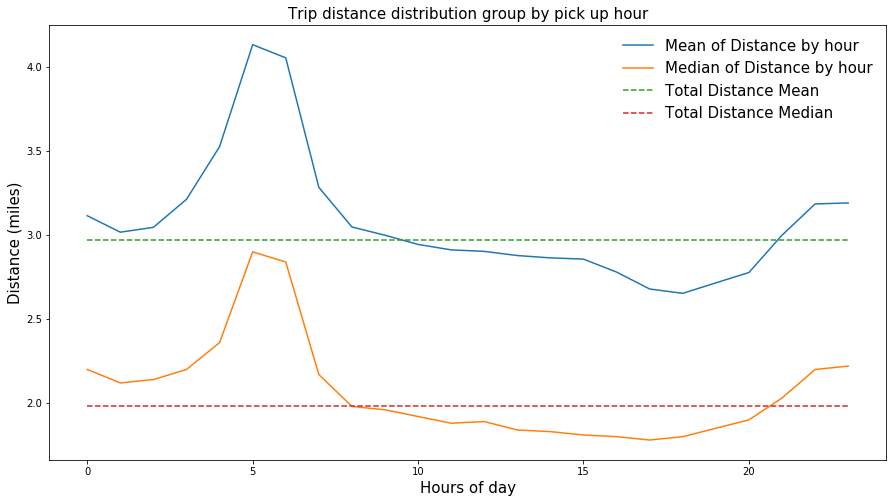

In [16]:
# Plot it
f, ax = plt.subplots(figsize = (15,8))
line1, = ax.plot(table.index, table['Mean of distance'])
line2, = ax.plot(table.index, table['Median of distance'])
line3, = ax.plot(table.index, [trip_mean]*24,'--')
line4, = ax.plot(table.index, [trip_median]*24, '--')
plt.title('Trip distance distribution group by pick up hour',size = 15)
plt.xlabel('Hours of day',size = 15)
plt.ylabel('Distance (miles)',size = 15)
plt.legend((line1, line2, line3, line4),  ('Mean of Distance by hour',
                                           'Median of Distance by hour', 
                                           'Total Distance Mean', 'Total Distance Median'), loc=1,
           fontsize=15, ncol=1, frameon=False)

<font size = 4>
We notice that:
1. Trip distance is relatively high in morning and evening. We assume that people prefer to take taxi due to some difficulties in taking long time public transportation that time, like less shuttles and safty problems. 
- There is peak of distance around 5-6am. The long distance peak around 5-6am might because people are in a rush and want to save time, like catch a flight or a meeting during that day.

# 3.2 Airport Trips

## 3.2.1 Identifying trips to/from one of NYC airports
### Method 1: Select trips with RateCodeID 2 or 3
<font size = 3.5>
We find a documentation that explain the meaning of keys http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

We think records with RateCodeID 2(JFK) and 3(Newark) may related to trips that originate or terminate at the NYC area airports. So look at their dropoff or pick up location first.
 
In this method, ** the numbers of records with RateCodeID = 2 or 3 is 5552**

In [17]:
# Transform the lat & lng to x & y
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0)) 
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

# Transform the lat & lng to x & y
data['Pickup_x'], data['Pickup_y'] = zip(*data.apply(lambda x: lat_lng_to_pixels(x.Pickup_latitude,
                                                                                 x.Pickup_longitude),
                                            axis=1))
data['Dropoff_x'], data['Dropoff_y'] = zip(*data.apply(lambda x: lat_lng_to_pixels(x.Dropoff_latitude,
                                                                                   x.Dropoff_longitude),
                                             axis=1))

Numbers of records with RateCodeID = 2 or 3: 5552


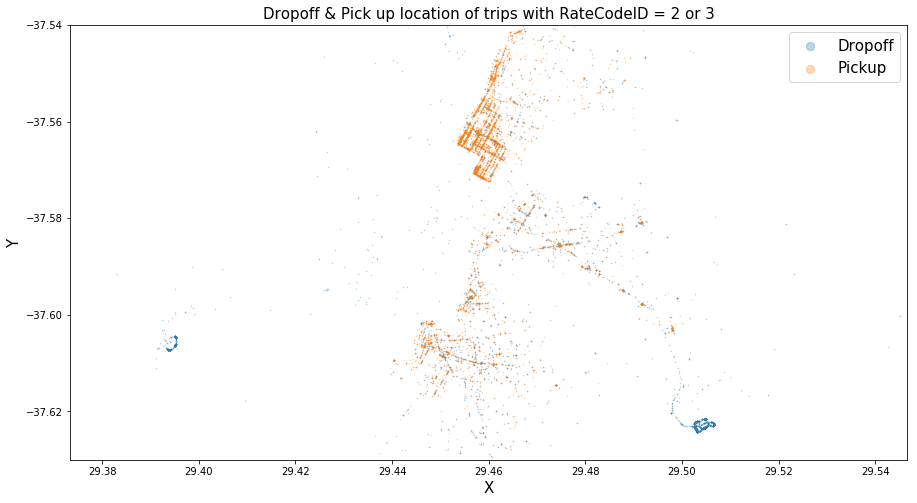

In [18]:
# select the data that may related to airport trips with RateCodeID
airport_data = data[(data.RateCodeID == 3) | (data.RateCodeID == 2)]

# Plot Pickup and Dropoff location
f, ax = plt.subplots(figsize = (15,8))
plt.xlim(29.40, 29.52) 
plt.ylim(-37.63, -37.54)

ax.scatter(airport_data.Dropoff_x, airport_data.Dropoff_y, s=.3, alpha=0.3,label = 'Dropoff')
ax.scatter(airport_data.Pickup_x, airport_data.Pickup_y, s=.3, alpha=0.3, label = 'Pickup')
ax.legend(fontsize = 15,markerscale = 15)

plt.title('Dropoff & Pick up location of trips with RateCodeID = 2 or 3',size = 15)
plt.xlabel('X',size = 15) 
plt.ylabel('Y',size = 15)
plt.axis('equal')
plt.xlim(29.40, 29.52) 
plt.ylim(-37.63, -37.54)
print('Numbers of records with RateCodeID = 2 or 3: {}'.format(airport_data.shape[0]))

<font size = 3.5>From the scatter plot above, we learn that **trips with RateCodeID 2(JFK) and 3(Newark) means they drop off at airports(the blue points clustered in 2 places which are airports in google map)**. 
It's not full airport transactions. So we will calculate distance between Dropoff/Pickup locations and airports locations to filter transactions that originate or terminate at one of the NYC area airports.
 

### Method 2: Select trips by calculated distance

<font size = 3.5> 
1. We find 3 airports latitude & longtitude in google map: JFK(40.6413111, -73.7803278), Newark(40.6895314, -74.1766511), LGA(40.8651848, -73.7299953).
2. Then we select trips whose distance between pickup/dropoff locations and airports is within 1500m.
3. After plotting it, we find the pickup/dropoff locations are clustered in aiports location. So we believe this method is convincing.

We also tried to filter LGA airport trips, but we found there is no such data. There are more trips to/from JFK than Newark. Beside, most of airports trips are dropp off at JFK. 

In this method, ** the number of trips to/from airports is 13658**

Numbers of trip that pick up at Newark: 42
Numbers of trip that drop off at Newark: 716
Numbers of trip that pick up at JFK: 286
Numbers of trip that drop off at JFK: 12841


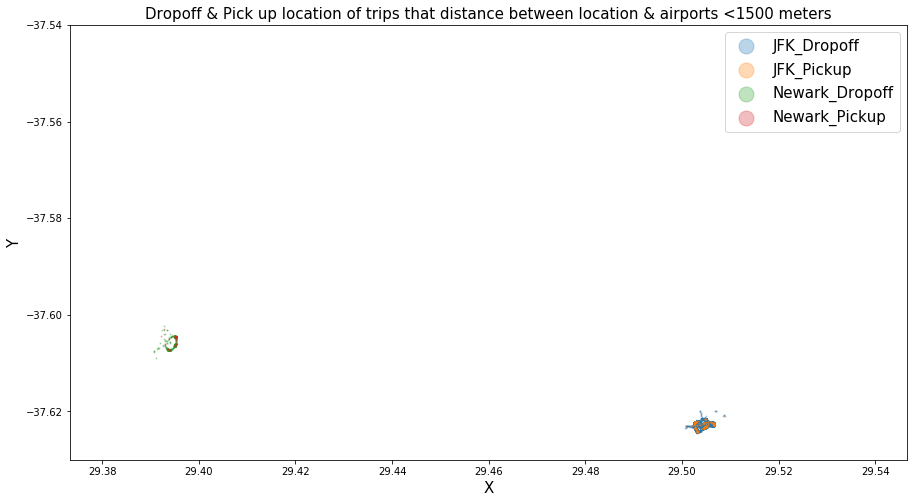

In [19]:
def haversine(lat1, lon1, lat2, lon2): 
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # translate the decimal into radio
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # haversine calculation
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # the earth r
    return c * r * 1000
# JFK & Newark lat & long             
JFK = (40.6413111, -73.7803278)
Newark = (40.6895314, -74.1766511)

Distance = 1500 # We regard distance <1500 meters would inside the airports
Newark_Pickup = data[haversine(data.Pickup_latitude,data.Pickup_longitude,Newark[0],Newark[1])<Distance]
Newark_Dropoff = data[haversine(data.Dropoff_latitude,data.Dropoff_longitude,Newark[0],Newark[1])<Distance]
JFK_Pickup = data[haversine(data.Pickup_latitude,data.Pickup_longitude,JFK[0],JFK[1])<Distance]
JFK_Dropoff = data[haversine(data.Dropoff_latitude,data.Dropoff_longitude,JFK[0], JFK[1])<Distance]

# Plot Pickup and Dropoff location
f, ax = plt.subplots(figsize = (15,8))
plt.axis('equal')
plt.xlim(29.40, 29.52) 
plt.ylim(-37.63, -37.54)
plt.title('Dropoff & Pick up location of trips that distance between location & airports <1500 meters',size = 15)
plt.xlabel('X',size = 15)
plt.ylabel('Y',size = 15)
ax.scatter(JFK_Dropoff.Dropoff_x, JFK_Dropoff.Dropoff_y,s =1, alpha = 0.3, label = 'JFK_Dropoff')
ax.scatter(JFK_Pickup.Pickup_x, JFK_Pickup.Pickup_y,s =1, alpha = 0.3, label = 'JFK_Pickup')
ax.scatter(Newark_Dropoff.Dropoff_x, Newark_Dropoff.Dropoff_y,s =1, alpha = 0.3, label = 'Newark_Dropoff')
ax.scatter(Newark_Pickup.Pickup_x, Newark_Pickup.Pickup_y,s =1, alpha = 0.3, label = 'Newark_Pickup')
ax.legend(fontsize = 15,markerscale = 15)

print('Numbers of trip that pick up at Newark: {}'.format(Newark_Pickup.shape[0]))
print('Numbers of trip that drop off at Newark: {}'.format(Newark_Dropoff.shape[0]))
print('Numbers of trip that pick up at JFK: {}'.format(JFK_Pickup.shape[0]))
print('Numbers of trip that drop off at JFK: {}'.format(JFK_Dropoff.shape[0]))

In [20]:
# So we merge them together and drop duplicates
airport_distance = pd.concat([Newark_Dropoff,Newark_Pickup,JFK_Dropoff,JFK_Pickup]).drop_duplicates()
print('Number of trips that to/from at one of the NYC area airports: {}'.format(airport_distance.shape[0]))

Number of trips that to/from at one of the NYC area airports: 13658


## 3.2.2 Interesting Characteristics of Airport Trips

Now we dive into these data and explore some interesting features.

### Characteristic 1: Higher averge fare

In [21]:
print('Average fare amount of trips to/from NYC airports(Newark or JFK): ${:.2f}'.format(
    airport_distance.Fare_amount.mean()))
print('Average fare amount of all trips: ${:.2f}'.format(data.Fare_amount.mean()))

Average fare amount of trips to/from NYC airports(Newark or JFK): $43.33
Average fare amount of all trips: $12.54


### Characteristic 2: Higher averge trip distance & duration

<font size = 3.5>Since the average fare amount is relatively high, so we assume those trips might be long trips which means the trip distance and duration(calculated by dropoff time - pickup time) are relatively high too. 

In [22]:
print('Average trip distance of trips to/from NYC airports(Newark or JFK): {:.2f} miles'.format(
    airport_distance.Trip_distance.mean()))
print('Average trip distance of all trips: {:.2f} miles'.format(data.Trip_distance.mean()))

Average trip distance of trips to/from NYC airports(Newark or JFK): 14.12 miles
Average trip distance of all trips: 2.97 miles


In [23]:
data['Duration'] = round((pd.to_datetime(data.Lpep_dropoff_datetime)
                -pd.to_datetime(data.lpep_pickup_datetime)).dt.total_seconds()/60,
               1)
airport_distance['Duration'] = round((pd.to_datetime(airport_distance.Lpep_dropoff_datetime)
                -pd.to_datetime(airport_distance.lpep_pickup_datetime)).dt.total_seconds()/60,
               1)
print('Average duration of trips to/from NYC airports(Newark or JFK): {:.2f} minutes'.format(
    airport_distance.Duration.mean()))
print('Average duration of all trips: {:.2f} minutes'.format(data.Duration.mean()))

Average duration of trips to/from NYC airports(Newark or JFK): 41.19 minutes
Average duration of all trips: 20.26 minutes


### Characteristic 3: Different hour distribution compared to whole trips( more airport trips around 5am)

<font size = 3.5>Compared to average trip distance of all trips, average trip distance of trips to/from NYC airports(Newark or JFK) is much higher. Considering about **conclusion 2 in 3.1** that there is trip distance peak at 5am, we assume that might because there are more trips to/from airports that time. So we look into trips in hour distribution.

(array([67158., 53773., 41196., 31640., 26424., 16700., 22667., 41978.,
        58965., 62027., 57468., 56791., 57828., 57477., 66664., 73777.,
        79157., 88022., 97245., 96141., 90785., 86543., 84705., 79795.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

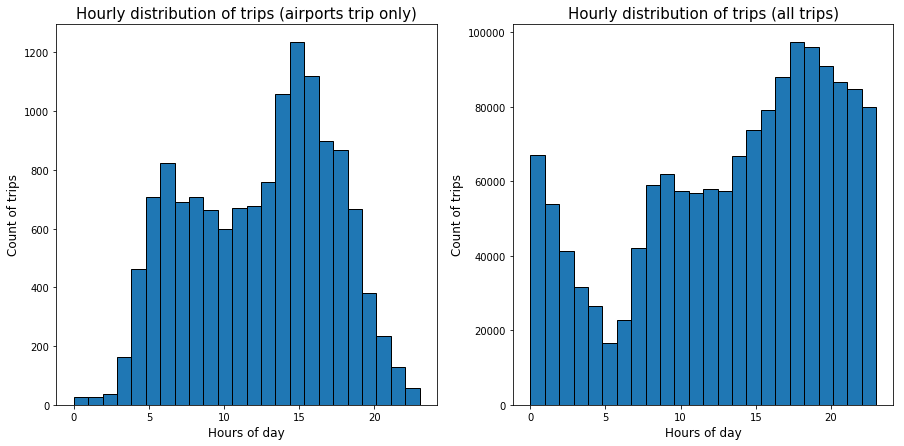

In [24]:
f, ax = plt.subplots(1,2,figsize = (15,7))
ax[0].set_title('Hourly distribution of trips (airports trip only)',size = 15)
ax[0].set_xlabel('Hours of day', size = 12)
ax[0].set_ylabel('Count of trips', size = 12)
ax[0].hist(airport_distance.Pickup_hour, edgecolor='black', bins = 24, label = 'Airport trips')
ax[1].set_title('Hourly distribution of trips (all trips)',size = 15)
ax[1].set_xlabel('Hours of day', size = 12)
ax[1].set_ylabel('Count of trips', size = 12)
ax[1].hist(data.Pickup_hour,bins = 24, edgecolor='black', label = 'All trips')

<font size = 3.5>From 2 different distributions below, we notice that:
1. Airports trips number around 5am achieves a peak while the total trips number around 5am achieves nadir. These may explain why the average trip distance is relative high around 5am (**conclusion 2 in 3.1**), because the proportion of long distance( airports trips) in 5am is higher than other hours'. 
2. Two distribution both achieve peak around 16-18pm. Although airport trips number achieve peak at 16pm, the non-airport trips number is much larger than it, which results in even shorter trip distance around 15-20pm. 
3. The magnitudes of 2 kinds of trips population are different. So it's hard to see whether our hypothesis that the peak around 5am is the results of high proportion of airports trips. So we would look at the average trip distance with/without airports trips on hours of day to check our hypothesis.

### Characteristic 4: Airports trips contributes to average long distance peak around 5am

<font size =3.5>The largest difference between trip distances with/without airports trips happens at 5am. Though it doesn't fully explain the distance peak at 5am, we still verified our hypothesis that the high proportion of airports trips contributs to long distance at 5am to some extent.

The table of trip distance by hour of day


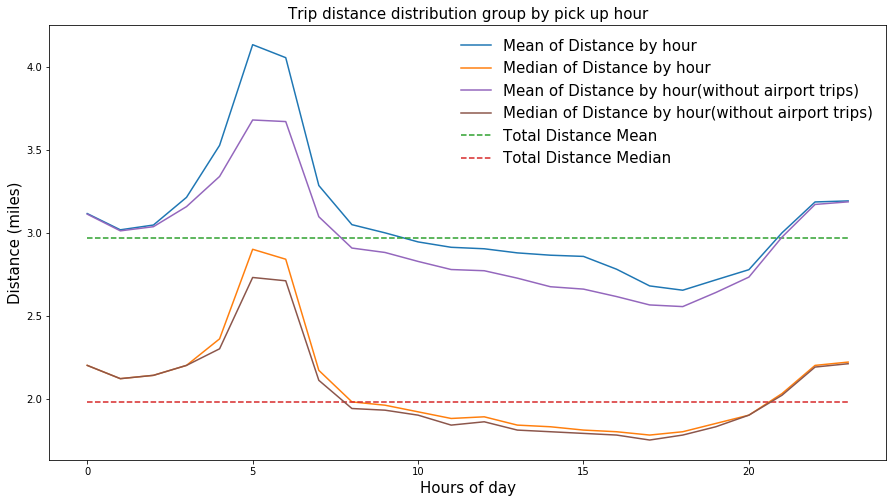

In [25]:
# Get the pick up hour of a trip
trip_mean = data.Trip_distance.mean()
trip_median = data.Trip_distance.median()
# Caculate the mean and median by hour
without_airport = data[~data.index.isin(airport_distance.index)]
# print(airport_distance.index)
table_without = without_airport.pivot_table(values = 'Trip_distance', index = 'Pickup_hour', 
                         aggfunc = [np.mean, np.median])
# print(without_airport.index)
table_without.columns = ['Mean of distance', 'Median of distance']
# Plot it
f, ax = plt.subplots(figsize = (15,8))
line1, = ax.plot(table.index, table['Mean of distance'])
line2, = ax.plot(table.index, table['Median of distance'])
line3, = ax.plot(table.index, [trip_mean]*24,'--')
line4, = ax.plot(table.index, [trip_median]*24, '--')
line5, = ax.plot(table_without.index, table_without['Mean of distance'])
line6, = ax.plot(table_without.index, table_without['Median of distance'])
plt.title('Trip distance distribution group by pick up hour', size = 15)
plt.xlabel('Hours of day',size = 15)
plt.ylabel('Distance (miles)',size = 15)
plt.legend((line1, line2, line5, line6, line3, line4),  
           ('Mean of Distance by hour',
            'Median of Distance by hour', 
            'Mean of Distance by hour(without airport trips)',
            'Median of Distance by hour(without airport trips)',
            'Total Distance Mean',
            'Total Distance Median',), loc=1,
           fontsize=15, ncol=1, frameon=False)
print('The table of trip distance by hour of day')
# table

### Characteristic 5: More tip percentage for airports trips

<font size = 3.5>We assume that people tend to pay more tips for airport trips. So we calculate the proportion of tip amount on fare amount to see whether there is big difference between trip with or without airport trips.
    
There are several trips that tip amounts are larger than fare amounts. After we look at some outliers, there might be some fake data (distance is 0 but duration, fare amount and tips are relative high). The majority percentage would be (0,0.5). So we look into the histgram of it.

In [26]:
airport_distance['Tip_percentage'] = airport_distance.apply(
                                                lambda x: x.Tip_amount/x.Total_amount if x.Total_amount else 0,
                                                        axis=1)
without_airport['Tip_percentage'] = without_airport.apply(
                                                lambda x: x.Tip_amount/x.Total_amount if x.Total_amount else 0,axis=1)

/Users/youyang/virtualenvs/AML/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


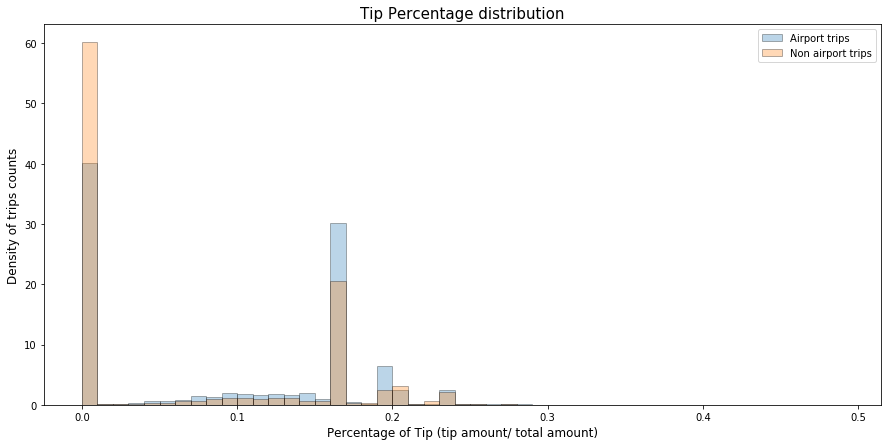

In [27]:
f, ax = plt.subplots(figsize = (15,7))
break_points = [i/100 for i in range(0,50)]
ax.set_title('Tip Percentage distribution',size = 15)
ax.set_xlabel('Percentage of Tip (tip amount/ total amount)', size = 12)
ax.set_ylabel('Density of trips counts', size = 12)
ax.hist(airport_distance.Tip_percentage, edgecolor='black', density = True, alpha = 0.3, 
        bins = break_points, label = 'Airport trips')
ax.hist(without_airport.Tip_percentage, density = True, edgecolor='black', alpha = 0.3,
        bins = break_points, label = 'Non airport trips')
ax.legend()

<font size = 3.5>It seems there are less transactions with 0 tip in airport trips and more tips in airports trips. But it may also be the results of long distance other than airport trip. We can check the relation between tip proportion and trip distance to verify it, but we skip this part right now. We will discuss tips fully in next part.